In [86]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [87]:
X, y = breast_cancer.data, breast_cancer.target
X.shape, y.shape

((569, 30), (569,))

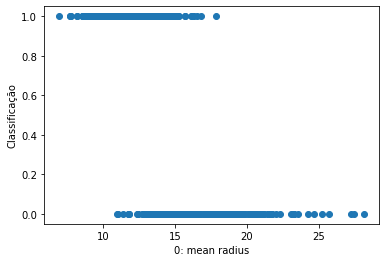

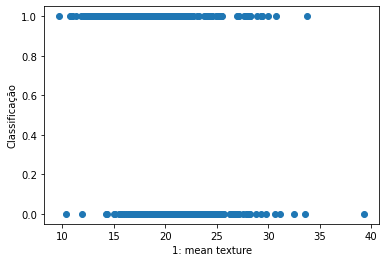

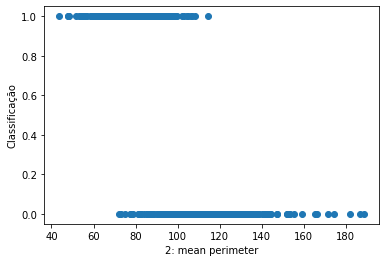

In [88]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.xlabel(f"{i}: {breast_cancer.feature_names[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X[:, i], y)
    plt.show()

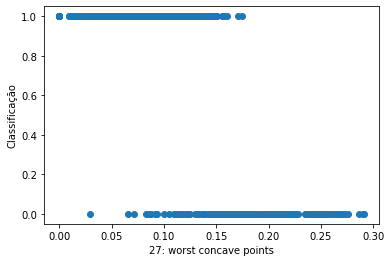

In [89]:
X27 = X[:, 27:28]
plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
plt.show()

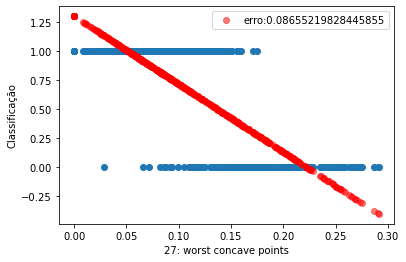

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
    def __init__(self):
        self.lrModel = LinearRegression()
    def fit(self, X, y):
        self.lrModel.fit(X, y)
    def predict(self, X):
        yPred = self.lrModel.predict(X)
        return yPred

plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)

modelo = ClassificadorLinear()
modelo.fit(X27, y)
yPred = modelo.predict(X27)
erro = mean_squared_error(y, yPred)
plt.plot(X27, yPred, 'ro', label=f"erro:{erro}", alpha=0.5)
plt.legend()
plt.show()

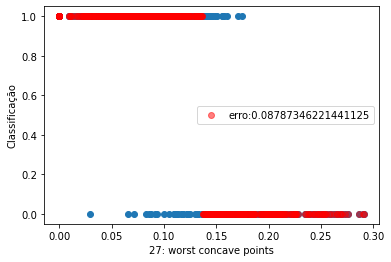

In [91]:
class ClassificadorLinearBooleano(ClassificadorLinear):  
    def predict(self, X):
        yPred = self.lrModel.predict(X)
        yPred = (yPred>0.5).astype(int)
        return yPred

plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)

modelo = ClassificadorLinearBooleano()
modelo.fit(X27, y)
yPred = modelo.predict(X27)
erro = mean_squared_error(y, yPred)
plt.plot(X27, yPred, 'ro', label=f"erro:{erro}", alpha=0.5)
plt.legend()
plt.show()

In [92]:
acuracia = sum(y == yPred)/len(y)
acuracia, 1-erro

(0.9121265377855887, 0.9121265377855887)

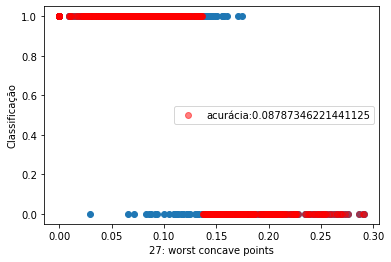

In [93]:
from sklearn.metrics import accuracy_score

plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)

modelo = ClassificadorLinearBooleano()
modelo.fit(X27, y)
yPred = modelo.predict(X27)
acuracia = accuracy_score(y, yPred)
plt.plot(X27, yPred, 'ro', label=f"acurácia:{erro}", alpha=0.5)
plt.legend()
plt.show()

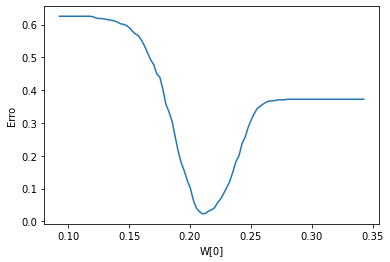

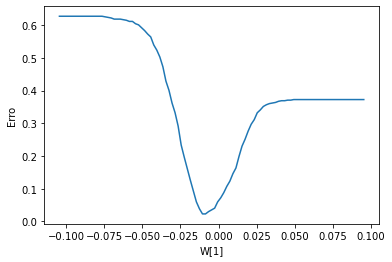

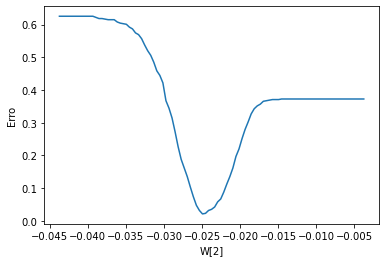

In [94]:
import numpy as np

modelo = ClassificadorLinearBooleano()
modelo.fit(X, y)

delta = [0.125, 0.1, 0.02, 0.005, 25, 25, 50, 50, 20, 50, 10, 4, 1, 0.05, 600, 200, 100, 200, 200, 1000, 0.1, 0.1, 0.02, 0.002, 25, 10, 10, 15, 10, 30, 1]

def plot(i):
    erros = []
    coef = modelo.lrModel.coef_[i]
    ws = np.linspace(coef-delta[i], coef+delta[i], 101)
    for w in ws:
        modelo.lrModel.coef_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.lrModel.coef_[i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws,erros)
    plt.show()

#for i in range(len(modelo.lrModel.coef_)):
for i in range(3):
    plot(i)

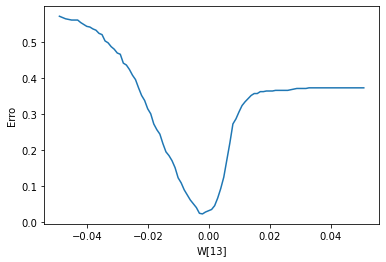

coef: 0.0009232178860694874
ws: [-6.07678211e-03 -5.98678211e-03 -5.89678211e-03 -5.80678211e-03
 -5.71678211e-03 -5.62678211e-03 -5.53678211e-03 -5.44678211e-03
 -5.35678211e-03 -5.26678211e-03 -5.17678211e-03 -5.08678211e-03
 -4.99678211e-03 -4.90678211e-03 -4.81678211e-03 -4.72678211e-03
 -4.63678211e-03 -4.54678211e-03 -4.45678211e-03 -4.36678211e-03
 -4.27678211e-03 -4.18678211e-03 -4.09678211e-03 -4.00678211e-03
 -3.91678211e-03 -3.82678211e-03 -3.73678211e-03 -3.64678211e-03
 -3.55678211e-03 -3.46678211e-03 -3.37678211e-03 -3.28678211e-03
 -3.19678211e-03 -3.10678211e-03 -3.01678211e-03 -2.92678211e-03
 -2.83678211e-03 -2.74678211e-03 -2.65678211e-03 -2.56678211e-03
 -2.47678211e-03 -2.38678211e-03 -2.29678211e-03 -2.20678211e-03
 -2.11678211e-03 -2.02678211e-03 -1.93678211e-03 -1.84678211e-03
 -1.75678211e-03 -1.66678211e-03 -1.57678211e-03 -1.48678211e-03
 -1.39678211e-03 -1.30678211e-03 -1.21678211e-03 -1.12678211e-03
 -1.03678211e-03 -9.46782114e-04 -8.56782114e-04 -7.667821

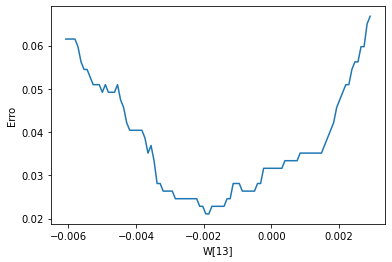

In [95]:
i=13

plot(i)

erros = []
coef = modelo.lrModel.coef_[i]
print(f"coef: {coef}")
ws = np.linspace(coef-0.007, coef+0.002, 101)
print(f"ws: {ws}")
for w in ws:
    modelo.lrModel.coef_[i] = w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
modelo.lrModel.coef_[i] = coef
plt.ylabel("Erro")
plt.xlabel(f"W[{i}]")
plt.plot(ws,erros)
plt.show()


In [96]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X.shape, y.shape, set(y)

((150, 4), (150,), {0, 1, 2})

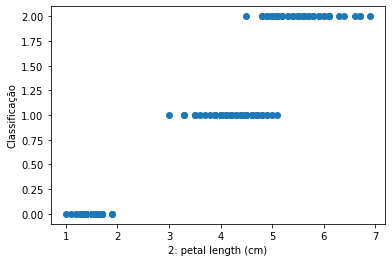

In [97]:
X2 = X[:, 2]
plt.xlabel(f"2: {iris.feature_names[2]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
plt.show()

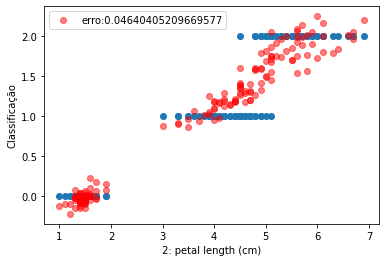

In [98]:
plt.xlabel(f"2: {iris.feature_names[2]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X, y)
yPred = modelo.predict(X)
erro = mean_squared_error(y, yPred)
plt.plot(X2, yPred, 'ro', label=f"erro:{erro}", alpha=0.5)
plt.legend()
plt.show()

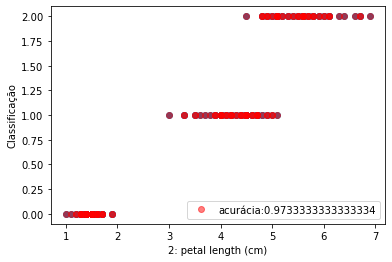

In [99]:
class ClassificadorLinearDiscreto(ClassificadorLinear):  
    def predict(self, X):
        yPred = self.lrModel.predict(X)
        yPred = np.rint(yPred)
        return yPred
 

plt.xlabel(f"2: {iris.feature_names[2]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinearDiscreto()
modelo.fit(X, y)
yPred = modelo.predict(X)
acuracia = accuracy_score(y, yPred)
plt.plot(X2, yPred, 'ro', label=f"acurácia:{acuracia}", alpha=0.5)
plt.legend()
plt.show()


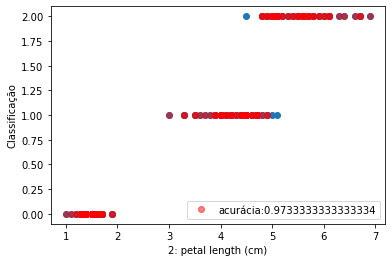

In [100]:
from sklearn.linear_model import LogisticRegression

plt.xlabel(f"2: {iris.feature_names[2]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = LogisticRegression()
modelo.fit(X, y)
yPred = modelo.predict(X)
acuracia = accuracy_score(y, yPred)
plt.plot(X2, yPred, 'ro', label=f"acurácia:{acuracia}", alpha=0.5)
plt.legend()
plt.show()

In [103]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


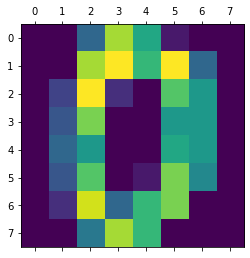

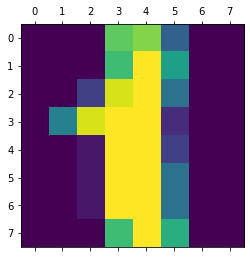

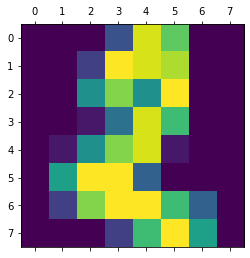

In [104]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.matshow(digits.images[i])
    plt.show()

In [105]:
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [106]:
ynovo = np.c_[y>5, y%2]
ynovo.T

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int32)

In [107]:
ynovo.shape

(1797, 2)

In [108]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier()
modelo.fit(X, ynovo)
ypred = modelo.predict(X)
ypred.T

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int32)

In [110]:
acuracia_grandes = accuracy_score(y>5, ypred[:, 0])
acuracia_impares = accuracy_score(y%2, ypred[:, 1])
acuracia_grandes, acuracia_impares

(0.993322203672788, 0.9961046188091264)

In [112]:
from sklearn.metrics import hamming_loss
erro = hamming_loss(ynovo, ypred)
erro

0.0052865887590428495